In [30]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Define the cavity dimension (number of Fock states)
N = 100

# Create the annihilation operator for the cavity
a = qt.destroy(N)

# Define parameters
omega = 1
epsilon = 2
kappa = 0.2

# Define collapse operators for Lindblad master equation
c_ops = [np.sqrt(kappa) * a]  # Cavity decay
# Define initial state (ground state)
psi0 = qt.basis(N, 0)
# Define time points for evolution
t_range = np.linspace(0, 100, 1000)
# Solve the master equation
options = options = dict(
    store_states=True,
    progress_bar=True,
    nsteps=int(1e6),
    rtol=1e-4,
    atol=1e-4,
    max_step=1.0,
)
# Define projection operator function
def P(N, n):
    return qt.basis(N, n) * qt.basis(N, n).dag()

def run_simulation(displacement):
    # Displace destroy operator
    d = a - displacement
    # Define the Hamiltonian
    H = omega * d.dag() * d  - omega * np.conj(displacement) * displacement
    # Solve the master equation
    result = qt.mesolve(H, psi0, t_range, c_ops, options=options)

    return result

In [32]:
# Run simulation for different displacements

# displacement_range = np.linspace(0.8, 2.8, 10) * -epsilon / (omega + 0.5j * kappa)
displacement_range = np.array([1.6, 2, 2.4]) * -epsilon / (omega + 0.5j * kappa)

results = qt.parallel_map(run_simulation, displacement_range)

10.0%. Run time:   2.92s. Est. time left: 00:00:00:26
10.0%. Run time:   3.17s. Est. time left: 00:00:00:28
10.0%. Run time:   3.37s. Est. time left: 00:00:00:30
20.0%. Run time:   6.76s. Est. time left: 00:00:00:26
20.0%. Run time:   7.39s. Est. time left: 00:00:00:29
20.0%. Run time:   8.12s. Est. time left: 00:00:00:32
30.0%. Run time:   9.86s. Est. time left: 00:00:00:22
30.0%. Run time:  10.73s. Est. time left: 00:00:00:24
30.0%. Run time:  11.51s. Est. time left: 00:00:00:26
40.0%. Run time:  13.18s. Est. time left: 00:00:00:19
40.0%. Run time:  14.62s. Est. time left: 00:00:00:21
40.0%. Run time:  15.74s. Est. time left: 00:00:00:23
50.1%. Run time:  16.30s. Est. time left: 00:00:00:16
50.1%. Run time:  18.02s. Est. time left: 00:00:00:17
60.1%. Run time:  19.61s. Est. time left: 00:00:00:13
50.1%. Run time:  19.68s. Est. time left: 00:00:00:19
60.1%. Run time:  21.65s. Est. time left: 00:00:00:14
70.1%. Run time:  22.64s. Est. time left: 00:00:00:09
60.1%. Run time:  23.42s. Es

In [33]:
# Manipulate results

result_states = np.array([r.states for r in results])

n_exp = np.zeros_like(result_states)
P_exp = np.zeros((displacement_range.size, N))

for i, states in enumerate(result_states):
    n_exp[i] = np.array([qt.expect(a.dag() * a, state) for state in states])
    P_exp[i] = np.array([qt.expect(P(N, j), states[-1]) for j in range(N)])

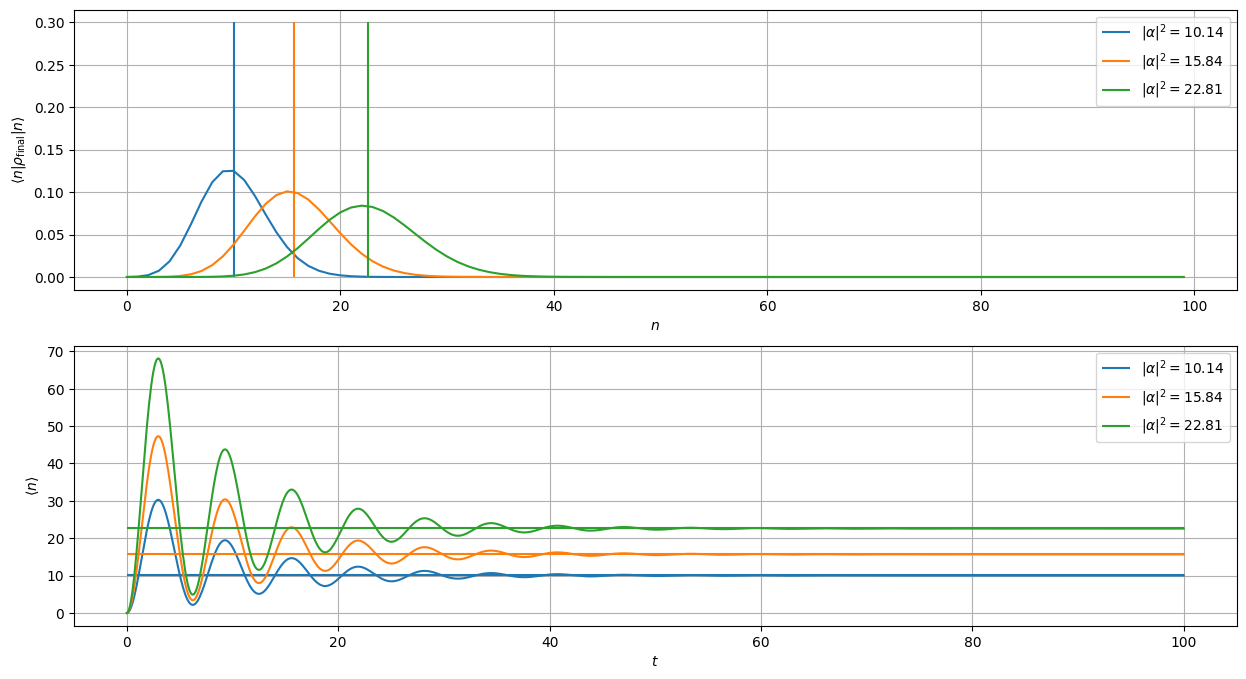

In [34]:
# Plot the results

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for j, displacement in enumerate(displacement_range):
    
    plot = ax1.plot(P_exp[j])
    ax1.vlines(n_exp[j][-1], 0, 0.3, color=plot[0].get_color(), label=f'$|\\alpha|^2 = {np.abs(displacement)**2:.2f}$')

    plot = ax2.plot(t_range, n_exp[j])
    ax2.hlines(np.abs(displacement)**2, 0, 100, color=plot[0].get_color(), label=f'$|\\alpha|^2 = {np.abs(displacement)**2:.2f}$')

ax1.set_xlabel('$n$')
ax1.set_ylabel('$\\langle n|\\rho_\\mathrm{final}|n\\rangle$')
ax1.grid(True)
ax1.legend()

ax2.set_xlabel('$t$')
ax2.set_ylabel('$\\langle n\\rangle$')
ax2.grid(True)
ax2.legend()

plt.show()